In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import os

In [3]:
filename = 'FLY199.csv'
data = pd.read_csv(filename, sep=',')
data.columns = [c.lstrip('IMU_ATTI(0):') for c in data.columns]

pitch = data['pitch']
roll = data['roll']
yaw = data['yaw']
time = data['GPS(0):Time']
altmsl = data['GPS(0):heightMSL']

/Users/austindixonwx/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (66,77,78,79,80,81,82,83,84,85,86,155,185) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


/Users/austindixonwx/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:61: RuntimeWarning: invalid value encountered in sqrt


Text(0.5,1,'Speed = {0:3.2f} m/s')

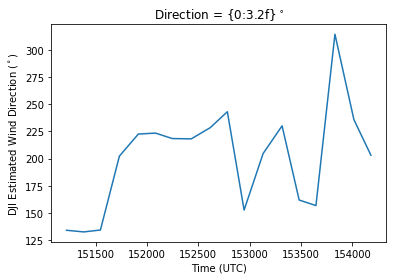

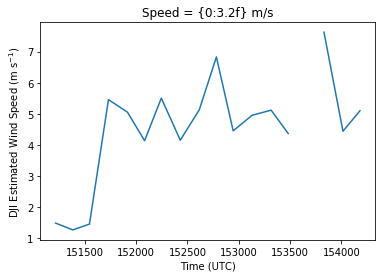

In [15]:
count = 1
nVals = len(roll)

psi_deg = np.zeros(nVals)
az_deg = np.zeros(nVals)

for j in range(nVals):
	crol = np.cos(roll[j] * np.pi/180.)
	srol = np.sin(roll[j] * np.pi/180.)
	cpit = np.cos(pitch[j] * np.pi/180.)
	spit = np.sin(pitch[j] * np.pi/180.)
	cyaw = np.cos(yaw[j] * np.pi/180.)
	syaw = np.sin(yaw[j] * np.pi/180.)

	Rx = np.matrix( [[1,0,0], [0,crol,srol], [0,-srol,crol]] )
	Ry = np.matrix( [[cpit,0,-spit], [0,1,0], [spit,0,cpit]] )
	Rz = np.matrix( [[cyaw,-syaw,0], [syaw,cyaw,0], [0,0,1]] )
	R = Rz * Ry * Rx

	psi_deg[j] = np.arccos(R[2, 2]) * 180./np.pi
	az_deg[j] = np.arctan2(R[1, 2], R[0, 2]) * 180./np.pi


	if az_deg[j] < 0.:
		az_deg[j] += 360.

#######################
# Plot Raw Copter Alt #
#######################
tstartArr = []
tendArr = []
for i in range(1, count):
	copStr = 'cop{0:02d}'.format(i)
	fig, ax = plt.subplots(1)
	ax.plot(time, altmsl)
	ax.xaxis.set_major_locator(mpdates.MinuteLocator(interval=2))
	ax.xaxis.set_major_formatter(mpdates.DateFormatter('%H:%M'))
	ax.set_xlabel('Time (UTC)')
	ax.set_ylabel('Altitude MSL (m)')
	tstart, tend = plt.ginput(2)
	tstartArr.append(tstart[0])
	tendArr.append(tend[0])

tstartArr = np.array(tstartArr)
tendArr = np.array(tendArr)

##############
# Statistics #
##############
# Direction
# rmse_dir = 0.
# for i in range(1, count):
# 	copStr = 'cop{0:02d}'.format(i)
# 	towStr = 'tow{0:02d}'.format(i)
	
# 	rmse_dir += np.sqrt(np.nanmean(
# 		(copDict[copStr].azAvg_deg - \
# 			towDict[towStr].dir10m[towDict[towStr].iTower]) ** 2.))

# calculate wind speeds
spdCalc = 10*np.sqrt(np.tan(psi_deg * np.pi/180.))
                    

# calculate raw wind speeds
for i in range(1, count):
	rawWindSpd = 10 * np.sqrt(
		np.tan(psi_deg * np.pi / 180.))

time_average = []
for i in range(3000, len(time) + 1, 3000):
    time_average.append(np.average(time[(i - 600):i]))    
    
spd_average = []
for i in range(3000, len(spdCalc) + 1, 3000):
    spd_average.append(np.average(spdCalc[(i - 600):i]))
    
dir_average = []
for i in range(3000, len(az_deg) + 1, 3000):
    dir_average.append(np.average(az_deg[(i - 600):i]))

####################
# Plot Comparisons #
####################
fig1, ax2 = plt.subplots(1)
fig2, ax3 = plt.subplots(1)

#for i in range(1, count):
	# copStr = 'cop{0:02d}'.format(i)
	# towStr = 'tow{0:02d}'.format(i)

ax2.plot(time_average, dir_average, '-')
ax2.set_ylabel('DJI Estimated Wind Direction ($^\circ$)')
ax2.set_xlabel('Time (UTC)')
ax2.set_title('Direction = {0:3.2f}$^\circ$')

ax3.plot(time_average, spd_average, '-')
ax3.set_ylabel('DJI Estimated Wind Speed (m s$^{-1}$)')
ax3.set_xlabel('Time (UTC)')
ax3.set_title('Speed = {0:3.2f} m/s')
# ax3.plot(copDict[copStr].psi_deg[copDict[copStr].iCopter])

# ax4.plot(copDict[copStr].az_deg[copDict[copStr].iCopter])
# ax4.plot(copDict[copStr].rawWindSpd)